In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('data_1024.csv',delimiter='\t')[['Distance_Feature','Speeding_Feature']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
Distance_Feature    4000 non-null float64
Speeding_Feature    4000 non-null float64
dtypes: float64(2)
memory usage: 62.6 KB


In [3]:
data.head()

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


In [4]:
data.shape

(4000, 2)

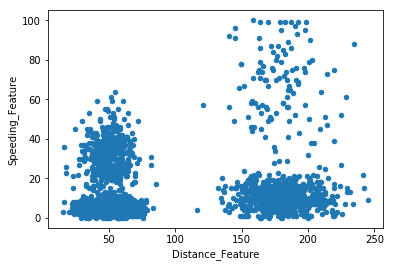

In [5]:
data.plot(x='Distance_Feature',y='Speeding_Feature',kind='scatter')

## vectorization

In [6]:
k=4
c=np.array(data.sample(n=k))
c

array([[ 48.21,   8.  ],
       [ 60.4 ,  28.  ],
       [ 44.31,  19.  ],
       [163.39,   6.  ]])

In [7]:
len(c)

4

In [8]:
x1=np.array(data)

In [9]:
type(x1)

numpy.ndarray

In [10]:
for i in range(100):
    x2=c[:,np.newaxis,:]
    distance=np.sqrt(np.sum(np.square(x2-x1),axis=2))
    c1=[]
    c2=[]
    c3=[]
    c4=[]
    c_index=np.argmin(distance,axis=0)
    count1=count2=count3=count4=0
    for i in range (len(c_index)):
        if c_index[i]==0:
            count1+=1
            c1.append(np.array(data)[i])
        elif c_index[i]==1:
            count2+=1
            c2.append(np.array(data)[i])
        elif c_index[i]==2:
            count3+=1
            c3.append(np.array(data)[i])
        elif c_index[i]==3:
            count4+=1
            c4.append(np.array(data)[i])
    c[0]=np.mean(c1,axis=0)
    c[1]=np.mean(c2,axis=0)
    c[2]=np.mean(c3,axis=0)
    #c[3]=np.mean(c4,axis=0)
        

In [11]:
x2

array([[[ 57.83452414,   5.2862069 ]],

       [[ 50.61421836,  33.06203474]],

       [[ 41.49579807,   5.39198218]],

       [[163.39      ,   6.        ]]])

In [12]:
distance

array([[ 26.37466929,  20.41498506,  22.72558509, ..., 113.27461436,
        118.30582206, 110.25803898],
       [ 21.23786863,   8.28653265,  15.18801038, ..., 122.12569094,
        128.62425762, 119.85594392],
       [ 37.36094241,  22.49951055,  31.59021489, ..., 129.58279809,
        134.64477251, 126.5856313 ],
       [ 94.73976198, 112.47639575, 101.05603644, ...,   9.62031185,
         12.78915556,   5.52535972]])

In [13]:
c_index

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

In [14]:
len(c_index)

4000

In [15]:
(x2-x1).shape

(4, 4000, 2)

In [16]:
len(c1),len(c2),len(c3),len(c4)

(1450, 403, 1347, 800)

In [17]:
count1,count2

(1450, 403)

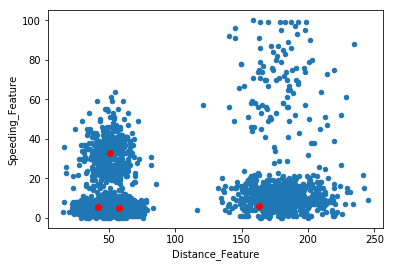

In [18]:
data.plot(x='Distance_Feature',y='Speeding_Feature',kind='scatter')
for i in range(k):
    plt.scatter(c[i][0],c[i][1],c='r')

In [19]:
 from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=0).fit(x1)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

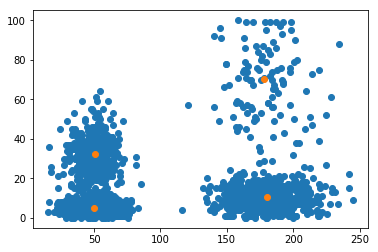

In [20]:
plt.scatter(x=data['Distance_Feature'],y=data['Speeding_Feature'],data=data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],)

## for loop

In [21]:
x1.shape

(4000, 2)

In [44]:
 for i in range(1000):
    dist=[]
    for i in c:
        for j in x1:
            dist.append((i-j)**2)
    dist=np.sum(np.array(dist)**2,axis=1).reshape(4,len(x1))
    index=np.argmin(dist,axis=0)
    for i in range(k):
        c[i]=np.mean(x1[np.where(index==i)],axis=0)

In [45]:
dist

array([[2.97569979e+05, 1.51550616e+05, 2.23863378e+05, ...,
        1.63226934e+08, 1.95597152e+08, 1.47214436e+08],
       [1.81027616e+05, 4.00857977e+03, 3.86900667e+04, ...,
        2.09493936e+08, 2.48758793e+08, 1.90292719e+08],
       [1.04689432e+06, 1.62757210e+05, 5.01334884e+05, ...,
        2.80744134e+08, 3.28939370e+08, 2.56578726e+08],
       [1.40424953e+08, 2.64819188e+08, 1.78316273e+08, ...,
        8.70507896e+03, 3.16093760e+04, 2.87051976e+04]])

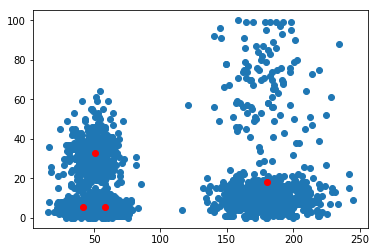

In [55]:
plt.scatter(x=data['Distance_Feature'],y=data['Speeding_Feature'],data=data)    
for i in range(k):
    plt.scatter(c[i][0],c[i][1],c='r')  


## kmeans++

In [56]:
k=2
x1=np.array(data)
c1=np.min(x1,axis=0)
c2=x1[np.argmax(np.sum(np.square(x1-c1),axis=1))]
cent=np.array([c1,c2])

In [62]:
c=[[],[]]
x2=cent[:,np.newaxis,:]
distance=np.sqrt(np.sum(np.square(x2-x1),axis=2))
c_index=np.argmin(distance,axis=0)
for i in range(k):
    c[i]=(x1[np.where(c_index==i)])
    
c3=x1[np.argmax(np.sum(np.square(c[0]-c1),axis=1))]
c4=x1[np.argmax(np.sum(np.square(c[1]-c2),axis=1))]
centroid=np.array([c1,c2,c3,c4])
centroid

array([[ 15.52,   0.  ],
       [234.52,  88.  ],
       [199.81,  32.  ],
       [ 30.37,  37.  ]])

In [63]:
 s=4
for i in range(10000):
    x2=centroid[:,np.newaxis,:]
    distance=np.sqrt(np.sum(np.square(x2-x1),axis=2))
    c_index=np.argmin(distance,axis=0)
    for i in range(s):
        centroid[i]=np.mean(x1[np.where(c_index==i)],axis=0)

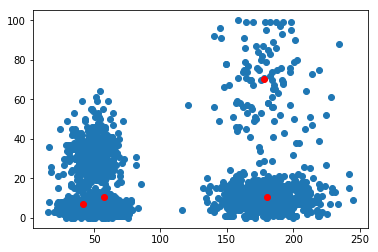

In [64]:
 plt.scatter(x=data['Distance_Feature'],y=data['Speeding_Feature'],data=data)    
for i in range(s):
    plt.scatter(centroid[i][0],centroid[i][1],c='r')

In [65]:
centroid

array([[ 41.68474206,   7.07407407],
       [177.83509615,  70.28846154],
       [180.43486331,  10.5294964 ],
       [ 57.57352279,  10.39668443]])